The derivative of the squared error loss with respect to the parameters $\boldsymbol{\beta}$ is given by the following.

$$
\begin{aligned}
\mathbf{y} &= \mathbf{X}\boldsymbol{\beta} \\
\hat{\mathbf{y}} &= \mathbf{X}\hat{\boldsymbol{\beta}} \\
\mathcal{L}(\boldsymbol{\beta}) &= \frac{1}{2}||\mathbf{y} - \hat{\mathbf{y}}||^2\\
\frac{\partial \mathcal{L}(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} &= \frac{\partial \mathcal{L}}{\partial \hat{\mathbf{y}}}\frac{\partial \hat{\mathbf{y}}}{\partial \boldsymbol{\beta}}\\
\frac{\partial \mathcal{L}}{\partial \hat{\mathbf{y}}} &= -\left(\mathbf{y} - \hat{\mathbf{y}}\right) \\
\frac{\partial \hat{\mathbf{y}}}{\partial \boldsymbol{\beta}} &= \mathbf{X}^\top \\
\frac{\partial \mathcal{L}(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} &= - \mathbf{X}^\top\left(\mathbf{y} - \mathbf{\hat{y}}\right) \\
&= \mathbf{X}^\top \mathbf{e}
\end{aligned}
$$

Setting this equal to $\mathbf{0}$, we get the typical OLS solution. 

$$
\begin{aligned}
\mathbf{0} &= \mathbf{X}^\top \mathbf{e} 
\\
&= \mathbf{X}^\top( \hat{\mathbf{y}} - \mathbf{y}) 
\\
&=  \mathbf{X}^\top( \mathbf{X}\boldsymbol{\hat{\beta}} - \mathbf{y} ) 
\\
\mathbf{X}^\top\mathbf{X}\boldsymbol{\hat{\beta}} &= \mathbf{X}^\top\mathbf{y} 
\\
\boldsymbol{\hat{\beta}} &= \left(\mathbf{X}^\top\mathbf{X}\right)^{-1}\mathbf{X}^\top\mathbf{y}
\end{aligned}
$$

We can also add in a penalty term to get penalized regression.

$$
\begin{aligned}
\mathcal{L}(\boldsymbol{\beta}) &= \frac{1}{2}||\mathbf{y} - \hat{\mathbf{y}}||^2 + \frac{\lambda}{2}||\boldsymbol{{\beta}}||^2
\\
\frac{\partial \mathcal{L}(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} &= \frac{\partial \mathcal{L}}{\partial \hat{\mathbf{y}}}\frac{\partial \hat{\mathbf{y}}}{\partial \boldsymbol{\beta}} + \lambda \boldsymbol{\beta}
\\
&= \mathbf{X}^\top \mathbf{e} + \lambda \boldsymbol{\beta}
\end{aligned}
$$

Setting this equal to $\mathbf{0}$, we get the Ridge Regression formula.

$$
\begin{aligned}
\mathbf{0}
&=  \mathbf{X}^\top(\mathbf{X}\boldsymbol{\hat{\beta}} -  \mathbf{y}) + \lambda \boldsymbol{\hat{\beta}} 
\\
\mathbf{X}^\top\mathbf{X}\boldsymbol{\hat{\beta}} + \lambda\boldsymbol{\hat{\beta}} &= \mathbf{X}^\top\mathbf{y} 
\\
\left(\mathbf{X}^\top\mathbf{X} + \mathbf{I}\lambda\right)\boldsymbol{\hat{\beta}} &= \mathbf{X}^\top\mathbf{y} 
\\
\boldsymbol{\hat{\beta}} &= \left(\mathbf{X}^\top\mathbf{X} + \mathbf{I}\lambda\right)^{-1}\mathbf{X}^\top\mathbf{y}
\end{aligned}
$$

In [348]:
# create data (X), parameters (betas), and output (y)
import numpy as np
np.random.seed(91)
X_shape = 300,5
X = np.random.randn(X_shape[0], X_shape[1]-1)
X = np.concatenate((np.ones(X_shape[0]).reshape(X_shape[0],1), X), axis = 1)
betas = 10*np.random.randn(X_shape[1])
for i in np.random.choice(range(X.shape[1]), int(X.shape[1]/3)):
    betas[i] = 0
y = X @ betas + 10*np.random.randn(len(y))

In [352]:
class LinReg:
    
    obj = 'LinReg Object'
    
    def __init__(self, name = None):
        self.name = name
       
    
    def fit_gd(self, X, y, lr = 0.001, stop = 0.0001, patience = 5, bhats = None, round_to = 3):
        # add X and y to object
        self.X = X
        self.y = y
        
        # instantiate bhats if not provided
        if bhats is None:
            bhats = np.random.randn(X.shape[1])
            
        # original fit 
        yhat = X @ bhats 
        e = y - yhat 
        
        # run it
        last_p = [np.inf for i in range(patience)]
        running = True
        while running:
            dLdB = X.T @ e
            bhats -= lr*dLdB
            yhat = X @ bhats
            e = yhat - y
            last_p = np.concatenate((last_p[1:], np.array([sum(e**2)])))
            if min(last_p[:-1]) - last_p[-1] <0.001:
                running = False
           
        # return final betas    
        self.gd_bhats = [round(i, 3) for i in bhats]
        
        
    def fit(self, X, y, round_to = 3):
        # add X and y to object
        self.X = X
        self.y = y
        bhats = np.linalg.inv(X.T @ X) @ X.T @ y
        self.bhats = [round(i, 3) for i in bhats]
        
    def ridge(self, X, y, lam, round_to = 3):
        self.X = X
        self.y = y
        bhats = np.linalg.inv(X.T @ X + np.eye(X.shape[1])*lam) @ X.T @ y
        self.ridge_bhats = [round(i, 3) for i in bhats]
        
    def lasso(self, X, y, lam, lr = 0.0001, stop = 0.0001, patience = 5, bhats = None, round_to = 3):
        self.X = X
        self.y = y
        if bhats is None: 
            bhats = np.random.randn(X.shape[1])
            
        # original fit 
        yhat = X @ bhats 
        e = y - yhat 
        
        # run it
        running = True
        last_p = [np.inf for i in range(patience)]
        while running:
            dLdB = X.T @ e + lam*abs(bhats)
            bhats -= lr*dLdB
            yhat = X @ bhats
            e = yhat - y
            last_p = np.concatenate((last_p[1:], np.array([sum(e**2) + sum(abs(bhats))])))
            if min(last_p[:-1]) - last_p[-1] <0.001:
                running = False
        self.lasso_bhats = [round(i, 3) for i in bhats]
        
    def predict(self, data = None, fitter = 'fit'):
        if data is None:
            data = self.X
        if fitter == 'fit':
            yhat = data @ self.bhats
        elif fitter == 'gd':
            yhat = data @ self.gd_bhats
        elif fitter == 'ridge':
            yhat = data @ self.ridge_bhats
        return(yhat)
    
        
LR = LinReg()
LR.fit_gd(X, y)
LR.fit(X, y)
LR.ridge(X, y, lam = 100)
LR.lasso(X, y, lam = 100)
yhat = LR.predict(data = X)

In [359]:
[round(i, 3) for i in betas]

[13.836, 0.227, -30.021, 0.0, 4.902]

In [353]:
LR.bhats

[13.353, -0.072, -30.279, -0.692, 4.448]

In [354]:
LR.gd_bhats

[13.353, -0.072, -30.277, -0.692, 4.45]

In [355]:
LR.ridge_bhats

[9.668, -0.213, -22.67, -0.567, 3.867]

In [356]:
LR.lasso_bhats

[8.717, -0.093, -31.144, -1.037, 3.348]

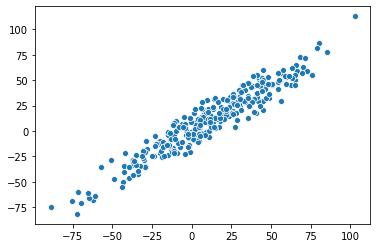

In [357]:
import seaborn as sns
sns.scatterplot(y, yhat);